In [2]:
%matplotlib notebook
import requests
import json, time, datetime, math
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

DATA_SOURCE = 'poloniex'
DATA_PATH = 'data/' + DATA_SOURCE + '/'
if DATA_SOURCE == 'poloniex':
    df_btc = pd.read_pickle(DATA_PATH + 'USDT_BTC.pkl')
    df_ltc = pd.read_pickle(DATA_PATH + 'USDT_LTC.pkl')
    df_eth = pd.read_pickle(DATA_PATH + 'USDT_ETH.pkl')
    df_xrp = pd.read_pickle(DATA_PATH + 'USDT_XRP.pkl')
else:
    data_df = pd.read_pickle(DATA_PATH + 'bitcoin.pkl')
    data_df_ltc = pd.read_pickle(DATA_PATH + 'litecoin.pkl')
    data_df_cap = pd.read_pickle(DATA_PATH + 'marketcap-total.pkl')



In [4]:
print("###BITCOIN")
#print(df_btc.describe())
print(df_btc.corr())

print("###LITECOIN")
#print(df_ltc.describe())
print(df_ltc.corr())

print("###ETHEREUM")
#print(df_eth.describe())
print(df_eth.corr())

print("###RIPPLE")
#print(df_xrp.describe())
print(df_xrp.corr())

"""
price_usd = data_df['price_usd'][0::100]
market_cap = data_df['market_cap'][0::100]
volume = data_df['volume_usd'][0::100]

fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(range(len(price_usd)), price_usd, label='Cena USD')
axes.plot(range(len(volume)), volume, label='Volume')
fig.show()
"""
#plt.plot(range(len(price_usd)), price_usd, label='Cena USD')
#plt.plot(range(len(market_cap)), market_cap, label='Market Cap')
#plt.plot(range(len(volume)), volume, label='Volume')
#plt.legend()
#plt.show()

###BITCOIN
                    close      date      high       low      open  \
close            1.000000  0.712512  0.999990  0.999990  0.999981   
date             0.712512  1.000000  0.712298  0.712744  0.712498   
high             0.999990  0.712298  1.000000  0.999981  0.999990   
low              0.999990  0.712744  0.999981  1.000000  0.999988   
open             0.999981  0.712498  0.999990  0.999988  1.000000   
quoteVolume      0.250365  0.391227  0.251331  0.249488  0.250521   
volume           0.562583  0.421893  0.564307  0.561025  0.562870   
weightedAverage  0.999994  0.712519  0.999994  0.999994  0.999992   

                 quoteVolume    volume  weightedAverage  
close               0.250365  0.562583         0.999994  
date                0.391227  0.421893         0.712519  
high                0.251331  0.564307         0.999994  
low                 0.249488  0.561025         0.999994  
open                0.250521  0.562870         0.999992  
quoteVolume        

"\nprice_usd = data_df['price_usd'][0::100]\nmarket_cap = data_df['market_cap'][0::100]\nvolume = data_df['volume_usd'][0::100]\n\nfig = plt.figure()\naxes = fig.add_subplot(111)\naxes.plot(range(len(price_usd)), price_usd, label='Cena USD')\naxes.plot(range(len(volume)), volume, label='Volume')\nfig.show()\n"

<IPython.core.display.Javascript object>


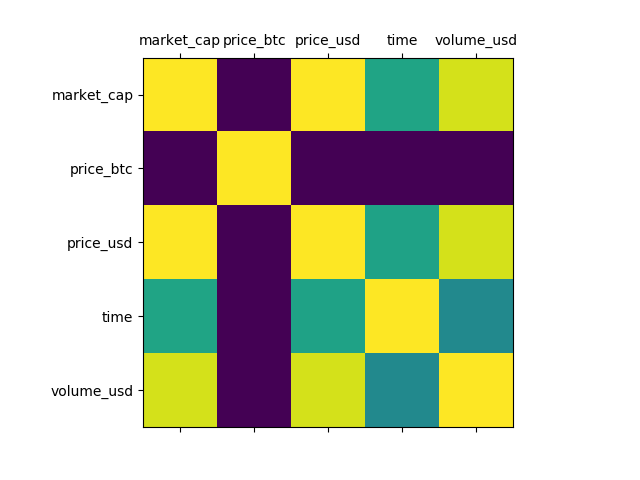

<IPython.core.display.Javascript object>


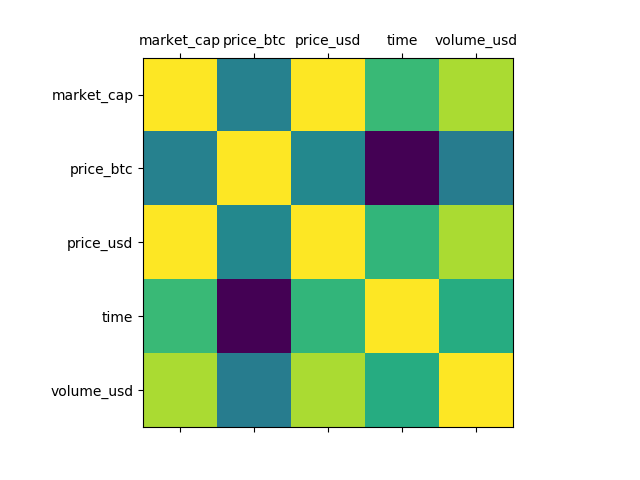

In [3]:
def plot_corr(df):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots()
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.show()
    
plot_corr(data_df)
plot_corr(data_df_ltc)
#plt.matshow(data_df.corr())

In [78]:
#outliers = [x for x in data_df if x['price_btc'] > 1]
#print(data_df.query('price_btc!=1'))
#print(data_df.duplicated(keep=False))

In [5]:
#helper functions
def print_time(msg, unix):
    print(msg, time.ctime(int(unix)))
    
def get_readable_time(unix):
    return [time.ctime(int(u)) for u in unix]

procent_change_btc = data_df['price_usd'].pct_change()[1:-1]
procent_change_ltc = data_df_ltc['price_usd'].pct_change()[1:-1]

btc = data_df['time_readable'].tolist()[20112]
ltc = data_df_ltc['time_readable'].tolist()[20112]
print(btc, ltc)

idx = 322355

btc_time = data_df['time'].tolist()
print_time('',btc_time[idx]/1000)
btc_time = [math.floor(((x/1000)/300))*300 for x in btc_time]
print_time('',btc_time[idx])

Mon Jul  8 05:01:02 2013 Mon Jul  8 06:46:01 2013
 Sun Jun  5 21:49:22 2016
 Sun Jun  5 21:45:00 2016


In [6]:
## combine these different collections into a list    
data_to_plot = [procent_change_btc, procent_change_ltc]

# Create a figure instance
fig = plt.figure(1)

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)


c:\users\deyan\tf-workspace\env\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
c:\users\deyan\tf-workspace\env\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [4]:
for i in range(10):
    print('nedicu')

nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
nedicu
